## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data upload and Preprocessing

In [3]:
data = pd.read_csv("Kolkata-1973-2024-cleaned.csv", parse_dates=['DATE'], index_col='DATE')
data.head(10)

,DEWP,MAX,MIN,MXSPD,PRCP,TEMP,VISIB,WDSP,Fog,Rain,Snow,Hail,Thunder,Tornado
DATE,,,,,,,,,,,,,,
1973-01-01,66.0,28.0,19.0,2.9,0.0,23.611111,1.7,0.6,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-02,56.2,26.0,15.0,7.0,0.0,20.777778,2.1,1.9,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-03,54.9,26.0,14.0,4.9,0.0,20.000000,2.7,1.5,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-04,51.1,28.0,12.0,4.9,0.0,20.111111,2.8,0.9,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-05,54.5,27.0,11.0,8.0,0.0,21.333333,2.1,1.8,1.0,0.0,0.0,0.0,0.0,0.0
1973-01-06,53.9,29.0,12.0,6.3,0.0,20.833333,2.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1973-01-07,56.5,30.0,13.0,4.6,0.0,21.555556,1.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1973-01-08,65.6,31.0,18.0,2.9,0.0,24.444444,1.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0
1973-01-09,65.9,33.0,19.0,7.0,0.0,25.333333,1.5,2.9,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.drop(columns=['Snow', 'Hail', 'Tornado'], inplace=True)
data.head()

,DEWP,MAX,MIN,MXSPD,PRCP,TEMP,VISIB,WDSP,Fog,Rain,Thunder
DATE,,,,,,,,,,,
1973-01-01,66.0,28.0,19.0,2.9,0.0,23.611111,1.7,0.6,0.0,0.0,0.0
1973-01-02,56.2,26.0,15.0,7.0,0.0,20.777778,2.1,1.9,0.0,0.0,0.0
1973-01-03,54.9,26.0,14.0,4.9,0.0,20.000000,2.7,1.5,0.0,0.0,0.0
1973-01-04,51.1,28.0,12.0,4.9,0.0,20.111111,2.8,0.9,0.0,0.0,0.0
1973-01-05,54.5,27.0,11.0,8.0,0.0,21.333333,2.1,1.8,1.0,0.0,0.0


In [5]:
cols = list(data.columns)
cols1 = [_ + '-1' for _ in cols]
col1 = dict(map(lambda i,j : (i,j) , cols,cols1))
cols2 = [_ + '-2' for _ in cols]
col2 = dict(map(lambda i,j : (i,j) , cols,cols2))
cols3 = [_ + '-3' for _ in cols]
col3 = dict(map(lambda i,j : (i,j) , cols,cols3))
cols4 = [_ + '-4' for _ in cols]
col4 = dict(map(lambda i,j : (i,j) , cols,cols4))
cols5 = [_ + '-5' for _ in cols]
col5 = dict(map(lambda i,j : (i,j) , cols,cols5))
cols6 = [_ + '-6' for _ in cols]
col6 = dict(map(lambda i,j : (i,j) , cols,cols6))
cols7 = [_ + '-7' for _ in cols]
col7 = dict(map(lambda i,j : (i,j) , cols,cols7))
cols8 = [_ + '-7' for _ in cols]
col8 = dict(map(lambda i,j : (i,j) , cols,cols8))
cols9 = [_ + '-9' for _ in cols]
col9 = dict(map(lambda i,j : (i,j) , cols,cols9))
cols10 = [_ + '-10' for _ in cols]
col10 = dict(map(lambda i,j : (i,j) , cols,cols10))

In [6]:
s1 = data[:].shift(+1).rename(columns=col1)
s2 = data[:].shift(+2).rename(columns=col2)
s3 = data[:].shift(+3).rename(columns=col3)
s4 = data[:].shift(+4).rename(columns=col4)
s5 = data[:].shift(+5).rename(columns=col5)
s6 = data[:].shift(+6).rename(columns=col6)
s7 = data[:].shift(+7).rename(columns=col7)
s8 = data[:].shift(+8).rename(columns=col8)
s9 = data[:].shift(+9).rename(columns=col9)
s10 = data[:].shift(+10).rename(columns=col10)
data_input = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10], axis=1)
data_input.head(10)

,DEWP-1,MAX-1,MIN-1,MXSPD-1,PRCP-1,TEMP-1,VISIB-1,WDSP-1,Fog-1,Rain-1,...,MAX-10,MIN-10,MXSPD-10,PRCP-10,TEMP-10,VISIB-10,WDSP-10,Fog-10,Rain-10,Thunder-10
DATE,,,,,,,,,,,,,,,,,,,,,
1973-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-02,66.0,28.0,19.0,2.9,0.0,23.611111,1.7,0.6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-03,56.2,26.0,15.0,7.0,0.0,20.777778,2.1,1.9,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-04,54.9,26.0,14.0,4.9,0.0,20.000000,2.7,1.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-05,51.1,28.0,12.0,4.9,0.0,20.111111,2.8,0.9,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-06,54.5,27.0,11.0,8.0,0.0,21.333333,2.1,1.8,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-07,53.9,29.0,12.0,6.3,0.0,20.833333,2.4,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-08,56.5,30.0,13.0,4.6,0.0,21.555556,1.1,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-09,65.6,31.0,18.0,2.9,0.0,24.444444,1.5,0.5,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
null_locations = data_input.isnull()

# Display rows and columns with NaN values
null_positions = null_locations.stack()[null_locations.stack()]
print(null_positions)

DATE                  
1973-01-01  DEWP-1        True
            MAX-1         True
            MIN-1         True
            MXSPD-1       True
            PRCP-1        True
                          ... 
1973-01-10  VISIB-10      True
            WDSP-10       True
            Fog-10        True
            Rain-10       True
            Thunder-10    True
Length: 605, dtype: bool


In [8]:
data_input.dropna(inplace=True)
data_input.head()

,DEWP-1,MAX-1,MIN-1,MXSPD-1,PRCP-1,TEMP-1,VISIB-1,WDSP-1,Fog-1,Rain-1,...,MAX-10,MIN-10,MXSPD-10,PRCP-10,TEMP-10,VISIB-10,WDSP-10,Fog-10,Rain-10,Thunder-10
DATE,,,,,,,,,,,,,,,,,,,,,
1973-01-11,62.2,29.0,18.0,7.0,0.0,24.000000,3.0,4.2,0.0,0.0,...,28.0,19.0,2.9,0.0,23.611111,1.7,0.6,0.0,0.0,0.0
1973-01-12,60.1,29.0,16.0,3.9,0.0,22.888889,2.5,1.3,0.0,0.0,...,26.0,15.0,7.0,0.0,20.777778,2.1,1.9,0.0,0.0,0.0
1973-01-13,64.6,29.0,17.0,5.8,0.0,23.166667,2.7,3.0,0.0,0.0,...,26.0,14.0,4.9,0.0,20.000000,2.7,1.5,0.0,0.0,0.0
1973-01-14,65.9,29.0,17.0,8.0,0.0,23.666667,2.6,2.8,0.0,0.0,...,28.0,12.0,4.9,0.0,20.111111,2.8,0.9,0.0,0.0,0.0
1973-01-15,50.0,27.0,13.0,8.9,0.0,18.722222,2.5,2.0,0.0,0.0,...,27.0,11.0,8.0,0.0,21.333333,2.1,1.8,1.0,0.0,0.0


In [9]:
data_input['Day of Year'] = data_input.index.day_of_year
data_input['Year'] = data_input.index.year
data_input['Month'] = data_input.index.month
data_input

,DEWP-1,MAX-1,MIN-1,MXSPD-1,PRCP-1,TEMP-1,VISIB-1,WDSP-1,Fog-1,Rain-1,...,PRCP-10,TEMP-10,VISIB-10,WDSP-10,Fog-10,Rain-10,Thunder-10,Day of Year,Year,Month
DATE,,,,,,,,,,,,,,,,,,,,,
1973-01-11,62.2,29.000000,18.000000,7.0,0.0,24.000000,3.0,4.2,0.0,0.0,...,0.0,23.611111,1.7,0.6,0.0,0.0,0.0,11,1973,1
1973-01-12,60.1,29.000000,16.000000,3.9,0.0,22.888889,2.5,1.3,0.0,0.0,...,0.0,20.777778,2.1,1.9,0.0,0.0,0.0,12,1973,1
1973-01-13,64.6,29.000000,17.000000,5.8,0.0,23.166667,2.7,3.0,0.0,0.0,...,0.0,20.000000,2.7,1.5,0.0,0.0,0.0,13,1973,1
1973-01-14,65.9,29.000000,17.000000,8.0,0.0,23.666667,2.6,2.8,0.0,0.0,...,0.0,20.111111,2.8,0.9,0.0,0.0,0.0,14,1973,1
1973-01-15,50.0,27.000000,13.000000,8.9,0.0,18.722222,2.5,2.0,0.0,0.0,...,0.0,21.333333,2.1,1.8,1.0,0.0,0.0,15,1973,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08,72.8,31.611111,23.888889,6.0,0.0,27.666667,1.8,3.7,0.0,0.0,...,0.0,29.722222,2.0,2.3,0.0,0.0,0.0,313,2024,11
2024-11-09,71.5,32.000000,22.777778,7.0,0.0,27.222222,2.1,4.7,0.0,0.0,...,0.0,29.500000,2.0,4.0,0.0,0.0,0.0,314,2024,11
2024-11-10,70.7,31.611111,23.000000,7.0,0.0,27.055556,2.3,3.8,0.0,0.0,...,0.0,30.000000,2.1,4.0,0.0,0.0,0.0,315,2024,11


In [10]:
data_input.drop(data_input.tail(2).index,inplace=True)
data_input

,DEWP-1,MAX-1,MIN-1,MXSPD-1,PRCP-1,TEMP-1,VISIB-1,WDSP-1,Fog-1,Rain-1,...,PRCP-10,TEMP-10,VISIB-10,WDSP-10,Fog-10,Rain-10,Thunder-10,Day of Year,Year,Month
DATE,,,,,,,,,,,,,,,,,,,,,
1973-01-11,62.2,29.000000,18.000000,7.0,0.0,24.000000,3.0,4.2,0.0,0.0,...,0.0,23.611111,1.7,0.6,0.0,0.0,0.0,11,1973,1
1973-01-12,60.1,29.000000,16.000000,3.9,0.0,22.888889,2.5,1.3,0.0,0.0,...,0.0,20.777778,2.1,1.9,0.0,0.0,0.0,12,1973,1
1973-01-13,64.6,29.000000,17.000000,5.8,0.0,23.166667,2.7,3.0,0.0,0.0,...,0.0,20.000000,2.7,1.5,0.0,0.0,0.0,13,1973,1
1973-01-14,65.9,29.000000,17.000000,8.0,0.0,23.666667,2.6,2.8,0.0,0.0,...,0.0,20.111111,2.8,0.9,0.0,0.0,0.0,14,1973,1
1973-01-15,50.0,27.000000,13.000000,8.9,0.0,18.722222,2.5,2.0,0.0,0.0,...,0.0,21.333333,2.1,1.8,1.0,0.0,0.0,15,1973,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,72.1,32.000000,24.000000,7.0,0.0,27.833333,1.7,4.3,0.0,0.0,...,0.0,29.055556,1.8,2.4,0.0,0.0,0.0,311,2024,11
2024-11-07,71.9,32.611111,24.388889,8.0,0.0,27.777778,2.0,2.8,0.0,0.0,...,0.0,29.777778,2.0,2.4,0.0,0.0,0.0,312,2024,11
2024-11-08,72.8,31.611111,23.888889,6.0,0.0,27.666667,1.8,3.7,0.0,0.0,...,0.0,29.722222,2.0,2.3,0.0,0.0,0.0,313,2024,11


In [11]:
data_output = data[['MAX', 'MIN']].loc['1973-01-11':]
data_output = data_output.shift(-2)
data_output.dropna(inplace=True)
data_output

,MAX,MIN
DATE,,
1973-01-11,29.000000,17.000000
1973-01-12,27.000000,13.000000
1973-01-13,26.000000,14.000000
1973-01-14,25.000000,11.000000
1973-01-15,25.000000,10.000000
...,...,...
2024-11-06,32.000000,22.777778
2024-11-07,31.611111,23.000000
2024-11-08,31.777778,21.388889


## Train-Test Split

In [12]:
train_start = data_input.index[0].date()
train_end = '2014-12-31'
print(f"Training done from {train_start} to {train_end}")

test_start = '2015-01-01'
test_end = data_input.index[-1].date()
print(f"Testing done from {test_start} to {test_end}")

Training done from 1973-01-11 to 2014-12-31
Testing done from 2015-01-01 to 2024-11-10


In [13]:
# Training set
X_train = data_input.loc[train_start:train_end]
y_train = data_output.loc[train_start:train_end]
print("Training Size: ",len(X_train))

# Testing set
X_test = data_input.loc[test_start:test_end]
y_test = data_output.loc[test_start:test_end]
print("Testing Size: ",len(X_test))

Training Size:  15330
Testing Size:  3602


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler2 = StandardScaler()
y_train_scaled = scaler2.fit_transform(y_train)
y_test_scaled = scaler2.transform(y_test)

## Linear Regression

In [15]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr=model_lr.predict(X_test)

print("Linear Regression - Root Mean Squared Error:", root_mean_squared_error(pred_lr, y_test))
print("Linear Regression - Mean Absolute Error:", mean_absolute_error(pred_lr, y_test))
print("Linear Regression - Mean Absolute Percentage Error:", mean_absolute_percentage_error(pred_lr, y_test))
print("Linear Regression - R2 Score:", r2_score(pred_lr, y_test))

Linear Regression - Root Mean Squared Error: 2.1266041436385414
Linear Regression - Mean Absolute Error: 1.6524776897499969
Linear Regression - Mean Absolute Percentage Error: 0.06524406333066016
Linear Regression - R2 Score: 0.6995697003478509


In [16]:
for i in range(2):
    print(y_train.columns[i] + "\n")
    coef_pairs = [(X_test.columns[j], model_lr.coef_[i][j].round(5)) for j in range(len(X_test.columns))]
    sorted_coef = sorted(coef_pairs, key=lambda x: x[1], reverse=True)

    for col, coeff in sorted_coef:
        print(col, "=", coeff)
    print()

MAX

Thunder-5 = 0.22275
Thunder-6 = 0.21766
MAX-1 = 0.21747
Fog-1 = 0.21062
TEMP-1 = 0.20571
Thunder-4 = 0.14313
Thunder-7 = 0.11422
Rain-7 = 0.09175
Rain-9 = 0.08222
Rain-10 = 0.07918
VISIB-5 = 0.07897
TEMP-10 = 0.07715
TEMP-6 = 0.07006
MAX-2 = 0.06751
WDSP-2 = 0.06647
Rain-6 = 0.06412
Thunder-3 = 0.0627
MAX-3 = 0.05881
Fog-2 = 0.05791
Rain-7 = 0.05671
TEMP-5 = 0.0543
Thunder-10 = 0.05255
VISIB-3 = 0.04979
TEMP-9 = 0.04963
Fog-6 = 0.04883
MAX-4 = 0.04543
MAX-10 = 0.03662
MAX-7 = 0.03407
TEMP-7 = 0.03384
VISIB-4 = 0.03285
WDSP-5 = 0.03234
WDSP-3 = 0.0259
VISIB-6 = 0.02428
MIN-2 = 0.02426
MAX-5 = 0.02369
TEMP-4 = 0.02318
MIN-10 = 0.01994
MAX-6 = 0.01881
MAX-9 = 0.01698
VISIB-10 = 0.01678
MIN-3 = 0.0167
Rain-5 = 0.01465
MAX-7 = 0.01395
WDSP-7 = 0.01339
MXSPD-7 = 0.01276
Rain-3 = 0.01059
WDSP-6 = 0.01014
TEMP-7 = 0.00982
MXSPD-9 = 0.00942
MXSPD-10 = 0.0093
WDSP-9 = 0.00569
PRCP-1 = 0.00487
MXSPD-7 = 0.00447
PRCP-2 = 0.00408
MIN-4 = 0.00395
MXSPD-1 = 0.00389
MXSPD-4 = 0.00376
PRCP-3 = 0.0

## Decision Tree Regressor

In [17]:
# Decision Tree
param_grid = { 'max_depth': [ 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [15, 20, 25, 30, 40, 50, 60, 75, 100]}

model_dt = DecisionTreeRegressor(random_state=0)

grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model_dt = grid_search.best_estimator_

pred_dt = best_model_dt.predict(X_test)

rmse = root_mean_squared_error(y_test, pred_dt)
mae = mean_absolute_error(y_test, pred_dt)
mape = mean_absolute_percentage_error(y_test, pred_dt)
r2 = r2_score(y_test, pred_dt)

print("Decision Tree - Best Parameters:", grid_search.best_params_)
print("Decision Tree - Root Mean Squared Error:", rmse)
print("Decision Tree - Mean Absolute Error:", mae)
print("Decision Tree - Mean Absolute Percentage Error:", mape)
print("Decision Tree - R2 Score:", r2)

Decision Tree - Best Parameters: {'max_depth': 7, 'min_samples_leaf': 75, 'min_samples_split': 2}
Decision Tree - Root Mean Squared Error: 2.1615964136509875
Decision Tree - Mean Absolute Error: 1.673977783634687
Decision Tree - Mean Absolute Percentage Error: 0.0669808225761172
Decision Tree - R2 Score: 0.7745896790702582


## Gradient Boosting Regressor

In [18]:
model_gbr1 = HistGradientBoostingRegressor(max_iter = 5000)
model_gbr1.fit(X_train, y_train['MAX'])
pred_gbr1 = model_gbr1.predict(X_test)

model_gbr2 = HistGradientBoostingRegressor(max_iter = 5000)
model_gbr2.fit(X_train, y_train['MIN'])
pred_gbr2 =model_gbr2.predict(X_test)

pred_gbr =  np.vstack((pred_gbr1, pred_gbr2)).T

print("Root mean squared error: ",root_mean_squared_error(pred_gbr, y_test))
print("Mean absolute error: ",mean_absolute_error(pred_gbr, y_test))
print("Mean absolute percentage error: ",mean_absolute_percentage_error(pred_gbr, y_test))
print("R2 score: ",r2_score(pred_gbr, y_test))

Root mean squared error:  2.019535862310951
Mean absolute error:  1.5365216339698773
Mean absolute percentage error:  0.061012591612847944
R2 score:  0.7519497546367577


## Bagging Regressor

In [19]:
model_bg = BaggingRegressor(n_estimators = 200, max_features = 1.0, max_samples = 1.0, random_state = 42)
model_bg.fit(X_train, y_train)

pred_bg = model_bg.predict(X_test)

print("Bagging - Root Mean Squared Error:", root_mean_squared_error(pred_bg, y_test))
print("Bagging - Mean Absolute Error:", mean_absolute_error(pred_bg, y_test))
print("Bagging - Mean Absolute Percentage Error:", mean_absolute_percentage_error(pred_bg, y_test))
print("Bagging - R2 Score:", r2_score(pred_bg, y_test))

Bagging - Root Mean Squared Error: 2.067500520522139
Bagging - Mean Absolute Error: 1.586065177910422
Bagging - Mean Absolute Percentage Error: 0.0640353901267261
Bagging - R2 Score: 0.7407687750697469


## Random Forest Regressor

In [20]:
model_rf = RandomForestRegressor(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 2, max_features = 1.0)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)

print("Random Forest - Root Mean Squared Error:", root_mean_squared_error(pred_rf, y_test))
print("Random Forest - Mean Absolute Error:", mean_absolute_error(pred_rf, y_test))
print("Random Forest - Mean Absolute Percentage Error:", mean_absolute_percentage_error(pred_rf, y_test))
print("Random Forest - R2 Score:", r2_score(pred_rf, y_test))

Random Forest - Root Mean Squared Error: 2.066528570295499
Random Forest - Mean Absolute Error: 1.5845038268229739
Random Forest - Mean Absolute Percentage Error: 0.06390045764704813
Random Forest - R2 Score: 0.7407075439298448


## ANN

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

# Build the model
model = Sequential([
    Dense(1024, activation='elu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(1e-5)),
    Dropout(0.25),
    Dense(512, activation='elu', kernel_regularizer=l2(1e-5)),
    Dropout(0.25),
    Dense(2)])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.Huber(delta=1.0),
              metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, min_delta=1e-7)
plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Train the model with validation split
history = model.fit(X_train_scaled, y_train_scaled,
                    epochs= 200,
                    batch_size= 256,
                    validation_data=(X_test_scaled, y_test_scaled),
                    callbacks=[early_stopping, plateau],
                    verbose=1)

test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

pred_ann = model.predict(X_test_scaled)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5984 - mean_absolute_error: 0.9571 - val_loss: 0.1367 - val_mean_absolute_error: 0.3939 - learning_rate: 0.0010
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1562 - mean_absolute_error: 0.4261 - val_loss: 0.1342 - val_mean_absolute_error: 0.3881 - learning_rate: 0.0010
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1432 - mean_absolute_error: 0.4052 - val_loss: 0.1371 - val_mean_absolute_error: 0.3977 - learning_rate: 0.0010
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1384 - mean_absolute_error: 0.3961 - val_loss: 0.1388 - val_mean_absolute_error: 0.3975 - learning_rate: 0.0010
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1335 - mean_absolute_error: 0.3864 - val_loss: 0.1294 - val_mean_absolute_error: 0.3809 - learning_rate: 0.0010
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1253 - mean_absolute_error: 0.3722 - val_loss: 0.1254 - val_mean_abs

In [22]:
pred_ann = scaler2.inverse_transform(pred_ann)
rmse = root_mean_squared_error(y_test, pred_ann)
mae = mean_absolute_error(y_test, pred_ann)
mape = mean_absolute_percentage_error(y_test, pred_ann)
r2 = r2_score(y_test, pred_ann)

# Print evaluation metrics
print("MLP with Dropout - Root Mean Square Error:", rmse)
print("MLP with Dropout - Mean Absolute Error:", mae)
print("MLP with Dropout - Mean Absolute Percentage Error:", mape)
print("MLP with Dropout - R2 Score:", r2)

MLP with Dropout - Root Mean Square Error: 2.0734818410749143
MLP with Dropout - Mean Absolute Error: 1.5925101263247996
MLP with Dropout - Mean Absolute Percentage Error: 0.06406669228952
MLP with Dropout - R2 Score: 0.7872519493103027


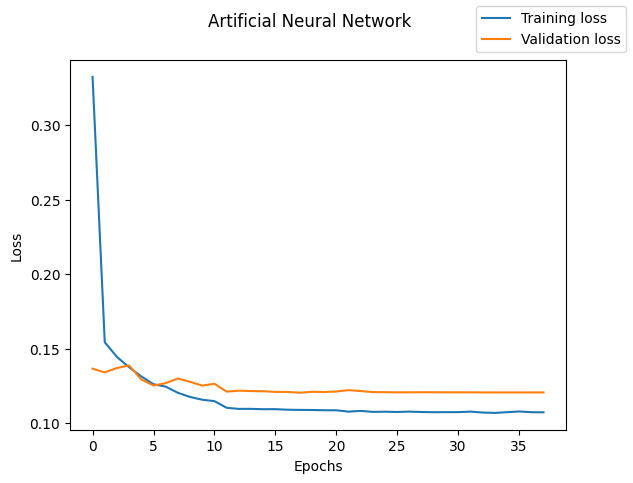

In [23]:
fig = plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
fig.legend()
fig.suptitle('Artificial Neural Network')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       116,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,927,688 (7.35 MB)

 Trainable params: 642,562 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,285,126 (4.90 MB)